In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from   scipy.ndimage import gaussian_filter1d
from   scipy.signal  import find_peaks

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from AnalysisGiessen import analyseGiessen


In [3]:
# Load the data from the CSV file
data = pd.read_csv('waveform_resampled_all_pressure_traces_rv_with_pca.csv')
time_series = data.iloc[which_obs, 0:101]

In [4]:
reps = 6

In [5]:
time_df= pd.DataFrame({'Pressure' : np.tile(time_series.values, reps), 'cPressure' : np.tile(time_series.values, reps)}, 
                      index=[i for i in range(reps*len(time_series))])

In [6]:
ag = analyseGiessen(df=time_df)

In [7]:
ag.sigma_filter_pressure = 0.0001 # 6 
ag.sigma_filter_dpdt     = 0.0001 # 4
ag.sigma_filter_d2pdt2   = 0.0001 # 2
ag.compute_derivatives()
ag.compute_points_of_interest(height=0, height_d2pdt2=0)

In [8]:
ag._points_df

,a_epad_ind,epad_ind,dia_ind,sys_ind,esp_ind,edp_ind,eivc_ind,t_max_dpdt,t_min_dpdt,t_max_p,...,esp,sys,EF,dia,tau,Ees/Ea,iT,iHR,edp,eivc
0,193,167,101,174,187,157,171,0.264,0.368,0.292,...,17.525599,19.945805,0.322077,0.445506,0.009728,0.475094,0.404,148.514851,1.68996,18.811398
1,294,268,202,275,288,258,272,0.264,0.368,0.292,...,17.525599,19.945805,0.322077,0.445506,0.009728,0.475094,0.404,148.514851,1.68996,18.811398
2,395,369,303,376,389,359,373,0.264,0.368,0.292,...,17.525599,19.945805,0.322077,0.445506,0.009728,0.475094,0.404,148.514851,1.68996,18.811398
3,496,470,404,477,490,460,474,0.264,0.368,0.292,...,17.525599,19.945805,0.322077,0.445506,0.009728,0.475094,0.404,148.514851,1.68996,18.811398
4,597,571,505,578,591,561,575,0.264,0.368,0.292,...,17.525599,19.945805,0.322077,0.445506,0.009728,0.475094,0.400,150.000000,1.68996,18.811398


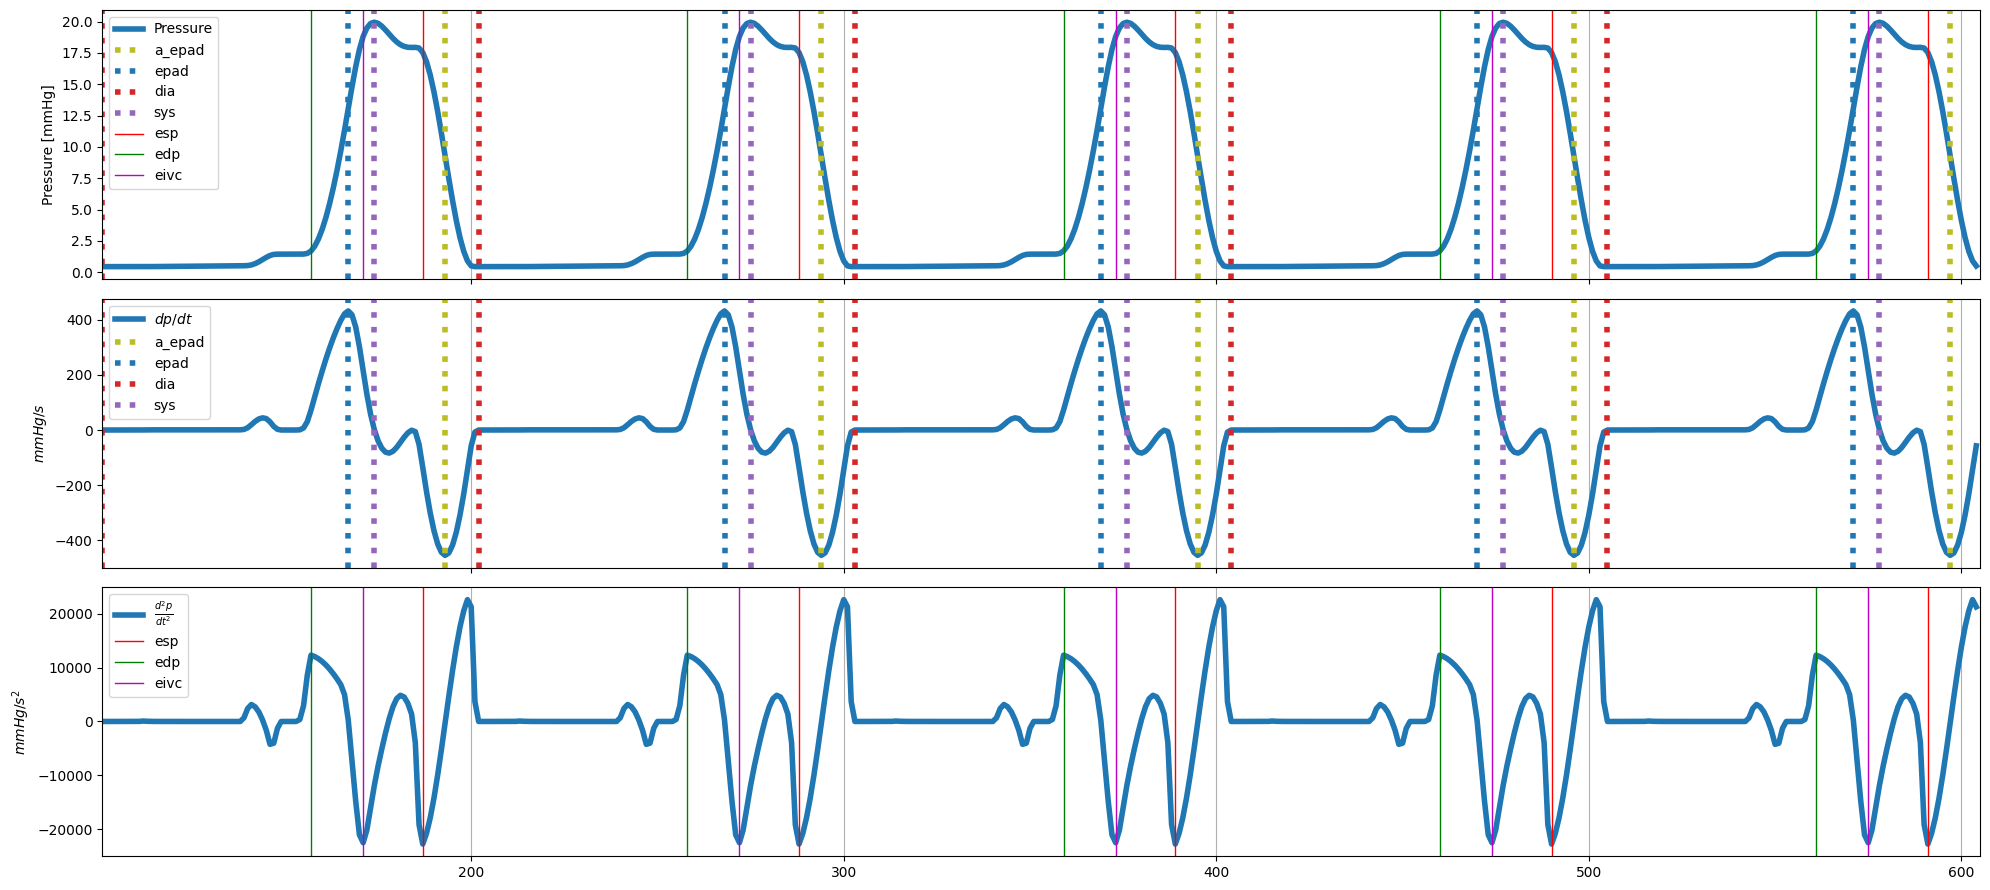

In [9]:
start = int(ag._points_df['dia_ind'].loc[0])
finish = len(ag._df) - 1
        
a_epad_ind = ag._points_df['a_epad_ind'].values.astype(int)
a_epad_ind = a_epad_ind[(a_epad_ind >= start) & (a_epad_ind < finish)]

epad_ind = ag._points_df['epad_ind'].values.astype(int)
epad_ind = epad_ind[(epad_ind >= start) & (epad_ind < finish)]

dia_ind = ag._points_df['dia_ind'].values.astype(int)
dia_ind = dia_ind[(dia_ind >= start) & (dia_ind < finish)]

sys_ind = ag._points_df['sys_ind'].values.astype(int)
sys_ind = sys_ind[(sys_ind >= start) & (sys_ind < finish)]

esp_ind = ag._points_df['esp_ind'].values.astype(int)
esp_ind = esp_ind[(esp_ind >= start) & (esp_ind < finish)]

edp_ind = ag._points_df['edp_ind'].values.astype(int)
edp_ind = edp_ind[(edp_ind >= start) & (edp_ind < finish)]

eivc_ind = ag._points_df['eivc_ind'].values.astype(int)
eivc_ind = eivc_ind[(eivc_ind >= start) & (eivc_ind < finish)]

fig, ax = plt.subplots(figsize=(20,9), nrows=3)
ax[0].grid(axis='x')
ax[0].plot(ag._df.index[start:finish], ag._df['fcPressure'].iloc[start:finish], label='Pressure', linewidth=4, linestyle='-')
ax[0].set_ylabel('Pressure [mmHg]')
ax[0].set_xlim([ag._df.index[start], ag._df.index[finish]])
ax[0].tick_params(axis='x',labelbottom=False)

flag0 = True
for a_epad, epad, dia, sys, esp, edp, eivc in zip(a_epad_ind, epad_ind, dia_ind, sys_ind, esp_ind, edp_ind, eivc_ind):
    ax[0].axvline(ag._df.index[a_epad], color=mcolors.TABLEAU_COLORS['tab:olive'], linewidth=4, linestyle=':', label='a_epad' if flag0 else None)
    ax[0].axvline(ag._df.index[epad],   color=mcolors.TABLEAU_COLORS['tab:blue'],  linewidth=4, linestyle=':', label='epad' if flag0 else None)
    ax[0].axvline(ag._df.index[dia],    color=mcolors.TABLEAU_COLORS['tab:red'],   linewidth=4, linestyle=':', label='dia' if flag0 else None)
    ax[0].axvline(ag._df.index[sys],    color=mcolors.TABLEAU_COLORS['tab:purple'],linewidth=4, linestyle=':', label='sys' if flag0 else None)
    ax[0].axvline(ag._df.index[esp],    color='r',                                 linewidth=1, linestyle='-', label='esp' if flag0 else None)
    ax[0].axvline(ag._df.index[edp],    color='g',                                 linewidth=1, linestyle='-', label='edp' if flag0 else None)
    ax[0].axvline(ag._df.index[eivc],   color='m',                                 linewidth=1, linestyle='-', label='eivc' if flag0 else None)
    flag0 = False
ax[0].legend()

ax[1].grid(axis='x')
ax[1].plot(ag._df.index[start:finish], ag._df['fdpdt'].iloc[start:finish] , label='${dp}/{dt}$', linewidth=4, linestyle='-')
ax[1].set_ylabel('$mmHg/s$')
ax[1].set_xlim([ag._df.index[start], ag._df.index[finish]])
ax[1].tick_params(axis='x',labelbottom=False)

flag1 = True
for a_epad, epad, dia, sys in zip(a_epad_ind, epad_ind, dia_ind, sys_ind):
    ax[1].axvline(ag._df.index[a_epad], color=mcolors.TABLEAU_COLORS['tab:olive'], linewidth=4, linestyle=':', label='a_epad' if flag1 else None)
    ax[1].axvline(ag._df.index[epad],   color=mcolors.TABLEAU_COLORS['tab:blue'],  linewidth=4, linestyle=':', label='epad' if flag1 else None)
    ax[1].axvline(ag._df.index[dia],    color=mcolors.TABLEAU_COLORS['tab:red'],   linewidth=4, linestyle=':', label='dia' if flag1 else None)
    ax[1].axvline(ag._df.index[sys],    color=mcolors.TABLEAU_COLORS['tab:purple'],  linewidth=4, linestyle=':', label='sys' if flag1 else None)
    flag1 = False
ax[1].legend()


ax[2].grid(axis='x')
ax[2].plot(ag._df.index[start:finish], ag._df['fd2pdt2'].iloc[start:finish] , label='$\\frac{d^2p}{dt^2}$', linewidth=4, linestyle='-')
ax[2].set_ylabel('$mmHg/s^2$')

flag2 = True
for sys, a_epad, esp, edp, eivc in zip(sys_ind, a_epad_ind, esp_ind, edp_ind, eivc_ind):
    ax[2].axvline(ag._df.index[esp],    color='r',                                   linewidth=1, linestyle='-', label='esp' if flag2 else None)
    ax[2].axvline(ag._df.index[edp],    color='g',                                   linewidth=1, linestyle='-', label='edp' if flag2 else None)
    ax[2].axvline(ag._df.index[eivc],   color='m',                                   linewidth=1, linestyle='-', label='eivc' if flag2 else None)
    flag2 = False
ax[2].set_xlim([ag._df.index[start], ag._df.index[finish]])
# ax[2].tick_params(axis='x', labelbottom=False)
ax[2].legend()

fig.tight_layout()

In [ ]:

def plot_posterior_simulations(dummy_data_dir, output_dir_bayesian):

    true_waveforms = pd.read_csv(f"{dummy_data_dir}/output_dummy_data/waveform_resampled_all_pressure_traces_rv_with_pca.csv")
    posterior_waveforms = pd.read_csv(f"{output_dir_bayesian}/waveform_resampled_all_pressure_traces_rv.csv")
    
    # Ground truth waveform
    which_obs = 3
    y_true = pd.Series(true_waveforms.iloc[which_obs, :101].values)

    # Posterior waveforms
    samples = posterior_waveforms.iloc[:, :101].values # Shape (100,101)
    

    # Compute and plot the mean waveform
    mean_waveform = samples.mean(axis=0)
    var_waveform = samples.var(axis=0) + 1e-6  # Adding a small constant to avoid division by zero
    
    
    fig, ax = plt.subplots(figsize=(10, 5))
    output_path_figures = os.path.join(output_dir_bayesian, "figures")
    os.makedirs(output_path_figures, exist_ok=True)

    
    
    # Inputs
    y_obs = y_true.values                    # shape: (101,)
    posterior_preds = samples               # shape: (100, 101)
    S, T = posterior_preds.shape            # S = 100, T = 101

    # Set Gaussian likelihood standard deviation (fixed)
    sigma = 1 # Dynamically adjust from observation model? Or is it always 1 as it is only concerned with waveform even if calibrated on something else?
    

    # Compute log pointwise predictive density
    log_likelihoods = -0.5 * np.log(2 * np.pi * sigma**2) \
                    - ((y_obs - posterior_preds)**2) / (2 * sigma**2)
    

    
    # log_likelihoods shape: (100, 101)
    # Average over posterior samples (axis 0), then sum over timepoints
    lppd =  np.sum(np.log(np.mean(np.exp(log_likelihoods), axis=0)))
    nlpd = -lppd

    # p_WAIC: sum of variances of log-likelihoods across posterior samples
    p_waic = np.sum(np.var(log_likelihoods, axis=0, ddof=1))  # scalar

    # WAIC computation
    waic = -2 * (lppd - p_waic)

    # Compute RMSE
    sqe = (y_obs - mean_waveform) ** 2
    rmse = np.sqrt(sqe.mean(axis=0))
    
    
    
    # Plot all waveforms in faded orange
    for j in range(samples.shape[0]):
        if j == 0:
            ax.plot(samples[j, :], color='bisque', label="Posterior Samples")
        else:
            ax.plot(samples[j, :], color='bisque', alpha=1)
    
    # Plot y_true
    ax.plot(y_true.values, label="True Waveform", color='c', linewidth=2)

    # Plot mean waveform
    ax.plot(mean_waveform, color='darkorange', linewidth=1.5, label="Mean Calibrated Waveform")
    
    
    ax.set_xticks(np.arange(0, 110, 10))
    ax.set_ylim(0,70)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.set_xlabel("Time Index", fontsize=16)
    ax.set_title(f"RMSE = {rmse:.4f}, NLPPD = {nlpd:.2f}")
    ax.set_ylabel("Pressure (mmHg)", fontsize=16)
    ax.set_yticks(np.arange(0,70, 10))
    
    #ax.legend()

    #fig.suptitle("Calibrated Pressure Waveforms for Different Methods")
    fig.tight_layout()
    fig.show()
    #fig.savefig(os.path.join(output_path_figures, "posterior_simulated_waveforms.png"))

/var/folders/28/nchybyxs1ps5wk3zmnqdpd8r0000gr/T/ipykernel_9208/1970010547.py:82: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


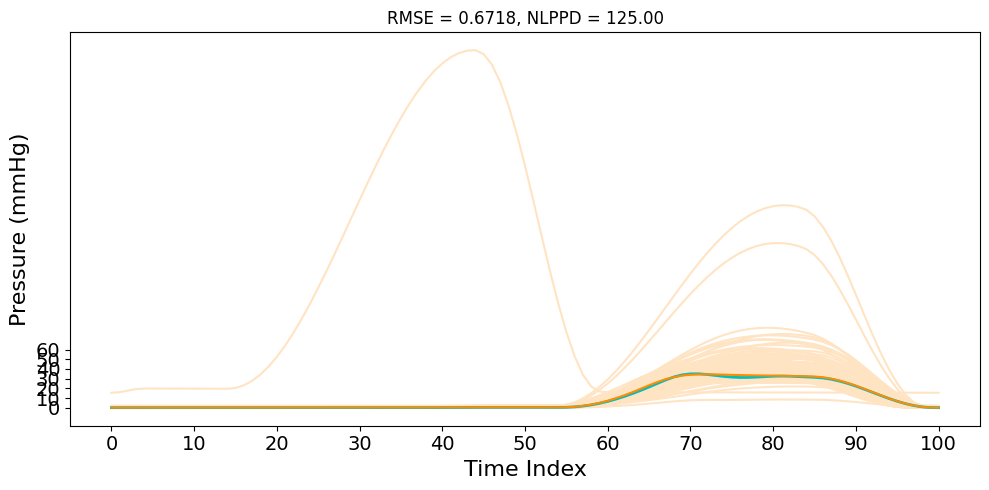

In [20]:
plot_posterior_simulations(
    dummy_data_dir = "../dummy_data",
    output_dir_bayesian = "../output_synthetic/output_4096_11_params/bayesian_calibration_results/11_output_keys/calibration_20250826_110720"
    )

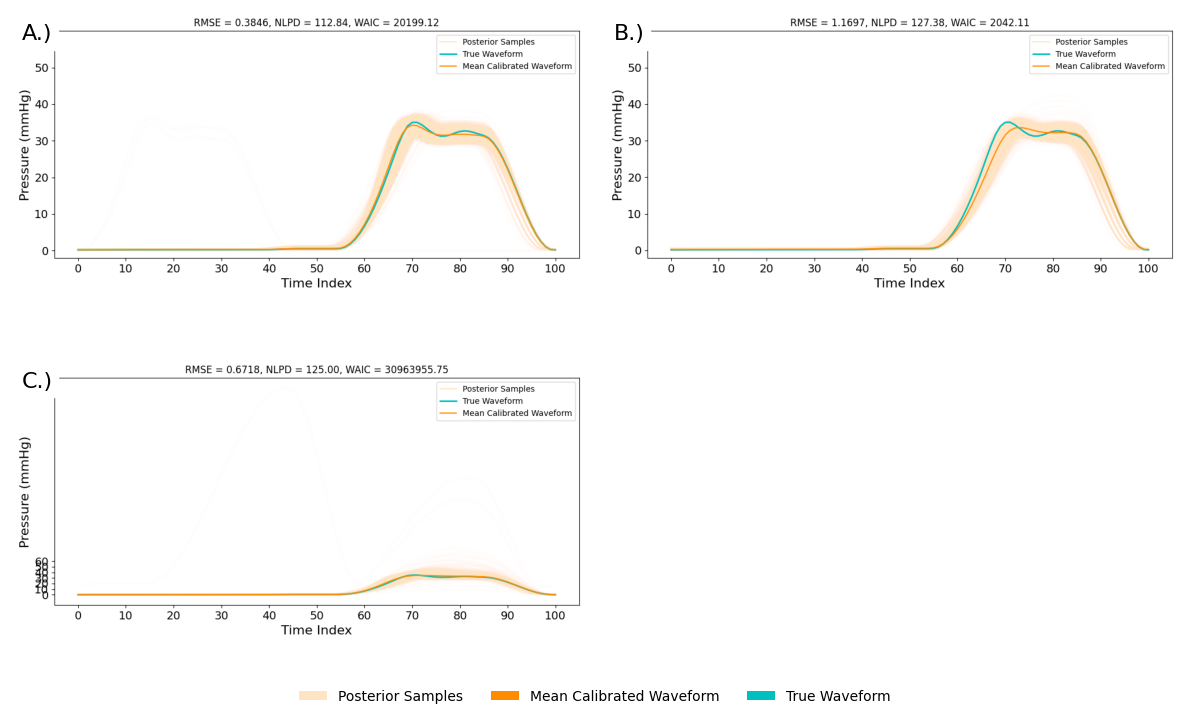

In [10]:
import os
import math
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Same image loading as before
dir = '/figures/posterior_simulated_waveforms.png'
image_paths = [
    f"../output_synthetic/output_4096_6_params/bayesian_calibration_results/11_output_keys/calibration_20250818_141427{dir}",  # CI
    f"../output_synthetic/output_4096_7_params/bayesian_calibration_results/102_output_keys/calibration_20250826_141923{dir}", # timeseries
    f"../output_synthetic/output_4096_11_params/bayesian_calibration_results/11_output_keys/calibration_20250826_110720{dir}"  # PCA

]

images = [Image.open(p) for p in image_paths]
labels = ['A.)', 'B.)', 'C.)', 'D.)', 'E.)', 'F.)']

# Layout calculation
n_images = len(images)
n_cols = 2
n_rows = math.ceil(n_images / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()

for i, (ax, img) in enumerate(zip(axes, images)):
    ax.imshow(img)
    ax.axis('off')
    ax.text(0.02, 0.95, labels[i], transform=ax.transAxes, fontsize=16,
            va='top', ha='left', backgroundcolor='white')

# Remove unused axes
for j in range(n_images, len(axes)):
    fig.delaxes(axes[j])


legend_elements = [
    Patch(facecolor='bisque', linewidth=1, label="Posterior Samples"),
    Patch(facecolor='darkorange', linewidth=1, label="Mean Calibrated Waveform"),
    Patch(facecolor='c', label='True Waveform', linewidth=1)
]

fig.legend(handles=legend_elements,
           loc='lower center',
           bbox_to_anchor=(0.5, 0.05),  # Centered below the figure
           fontsize=10,
           frameon=False,
           ncol=3)

plt.tight_layout(rect=[0, 0.07, 1, 1])  # Make space at bottom for legend
plt.savefig("combined_figure_with_legend.png", dpi=700, bbox_inches='tight')
plt.show()

In [11]:
def plot_posterior_simulations(output_dir_sims, output_dir_bayesian):
    
    true_waveforms = pd.read_csv(f"{output_dir_sims}/waveform_resampled_all_pressure_traces_rv.csv")
    posterior_waveforms = pd.read_csv(f"{output_dir_bayesian}/waveform_resampled_all_pressure_traces_rv.csv")
    
    # Ground truth waveform
    which_obs = 3
    y_true = pd.Series(true_waveforms.iloc[which_obs, :101].values)

    # Posterior waveforms
    samples = posterior_waveforms.iloc[:, :101].values # Shape (100,101)
    

    # Compute and plot the mean waveform
    mean_waveform = samples.mean(axis=0)
    var_waveform = samples.var(axis=0) + 1e-6  # Adding a small constant to avoid division by zero
    
    
    fig, ax = plt.subplots(figsize=(10, 5))
    output_path_figures = os.path.join(output_dir_bayesian, "figures")
    os.makedirs(output_path_figures, exist_ok=True)

    
    
    # Inputs
    y_obs = y_true.values                    # shape: (101,)
    posterior_preds = samples               # shape: (100, 101)
    S, T = posterior_preds.shape            # S = 100, T = 101

    # Set Gaussian likelihood standard deviation (fixed)
    sigma = 1 # Dynamically adjust from observation model? Or is it always 1 as it is only concerned with waveform even if calibrated on something else?
    

    # Compute log pointwise predictive density
    log_likelihoods = -0.5 * np.log(2 * np.pi * sigma**2) \
                    - ((y_obs - posterior_preds)**2) / (2 * sigma**2)
    

    
    # log_likelihoods shape: (100, 101)
    # Average over posterior samples (axis 0), then sum over timepoints
    lppd =  np.sum(np.log(np.mean(np.exp(log_likelihoods), axis=0)))
    nlpd = -lppd

    # p_WAIC: sum of variances of log-likelihoods across posterior samples
    p_waic = np.sum(np.var(log_likelihoods, axis=0, ddof=1))  # scalar

    # WAIC computation
    waic = -2 * (lppd - p_waic)

    # Compute RMSE
    sqe = (y_obs - mean_waveform) ** 2
    rmse = np.sqrt(sqe.mean(axis=0))
    
    
    
    # Plot all waveforms in faded orange
    for j in range(samples.shape[0]):
        if j == 0:
            ax.plot(samples[j, :], color='bisque', label="Posterior Samples")
        else:
            ax.plot(samples[j, :], color='bisque', alpha=0.05)
    
    # Plot y_true
    ax.plot(y_true.values, label="True Waveform", color='c', linewidth=2)

    # Plot mean waveform
    ax.plot(mean_waveform, color='darkorange', linewidth=1.5, label="Mean Calibrated Waveform")
    
    
    ax.set_xticks(np.arange(0, 110, 10))
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.set_xlabel("Time Index", fontsize=16)
    ax.set_title(f"RMSE = {rmse:.4f}, NLPD = {nlpd:.2f}, WAIC = {waic:.2f}")
    ax.set_ylabel("Pressure (mmHg)", fontsize=16)
    ax.set_yticks(np.arange(0,80, 10))
    ax.legend()

    #fig.suptitle("Calibrated Pressure Waveforms for Different Methods")
    fig.tight_layout()
    fig.savefig(os.path.join(output_path_figures, "posterior_simulated_waveforms.png"))


In [12]:
output_dir_sims = '../output_synthetic/output_4096_11_params/'
output_dir_bayesian = '../output_synthetic/output_4096_11_params/bayesian_calibration_results/30_output_keys/calibration_20250703_142009'




In [13]:
from utils import plot_utils

plot_utils.plot_posterior_simulations(output_dir_sims, output_dir_bayesian)

FileNotFoundError: [Errno 2] No such file or directory: '../output_synthetic/output_4096_11_params//output_dummy_data/waveform_resampled_all_pressure_traces_rv_with_pca.csv'